Importación de librerias

In [ ]:
!pip install scikit-learn
!pip install pixiedust

In [1]:
import pixiedust

Pixiedust database opened successfully


In [3]:
#import pandas #para trabajar con bases de datos y estadísticas básicas en forma de matrices que acepta números y strings
import pandas as pd
#import numpy #ayuda a operaciones con datos en forma vectorial, solo admite números
import numpy as np
#import matplotlib #herramienta para graficar
import matplotlib.pyplot as plt
#import seaborn #herramienta para graficas
import seaborn as sb

Carga de archivo

In [9]:
# use pandas to import csv file
df = pd.read_csv('https://raw.githubusercontent.com/jmcs-20/Diplomado/main/CHURN_2.csv')

df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,Cuenta_Corriente,Multiple_CC,Forma_Pago,OnlineSecurity,...,DeviceProtection,TechSupport,Atencion_Telf,Atencion_personal,Contract,Correspondencia,MonthlyCharges,TotalCharges,Churn,Letra
0,5575-GNVDE,Male,0,No,No,34,Yes,No,P2C,Yes,...,Yes,No,No,No,One year,No,56.95,1889.5,No,B
1,7795-CFOCW,Male,0,No,No,45,No,No,P2C,Yes,...,Yes,Yes,No,No,One year,No,42.30,1840.75,No,D
2,9305-CDSKC,Female,0,No,No,8,Yes,Yes,P2P,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,99.65,820.5,Yes,B
3,6713-OKOMC,Female,0,No,No,10,No,No,P2C,Yes,...,No,No,No,No,Month-to-month,No,29.75,301.9,No,D
4,6388-TABGU,Male,0,No,Yes,62,Yes,No,P2C,Yes,...,No,No,No,No,One year,No,56.15,3487.95,No,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3516,9767-FFLEM,Male,0,No,No,38,Yes,No,P2P,No,...,No,No,No,No,Month-to-month,Yes,69.50,2625.25,No,B
3517,8456-QDAVC,Male,0,No,No,19,Yes,No,P2P,No,...,No,No,Yes,No,Month-to-month,Yes,78.70,1495.1,No,D
3518,2569-WGERO,Female,0,No,No,72,Yes,No,WIRE,No,...,No,No,No,No,Two year,Yes,21.15,1419.4,No,B
3519,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,P2P,No,...,Yes,No,Yes,Yes,One year,Yes,103.20,7362.9,No,D


Verificamos la información del conjunto de datos usando el método info()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3521 entries, 0 to 3520
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customerID         3521 non-null   object 
 1   gender             3521 non-null   object 
 2   SeniorCitizen      3521 non-null   int64  
 3   Partner            3521 non-null   object 
 4   Dependents         3521 non-null   object 
 5   tenure             3521 non-null   int64  
 6   Cuenta_Corriente   3521 non-null   object 
 7   Multiple_CC        3521 non-null   object 
 8   Forma_Pago         3521 non-null   object 
 9   OnlineSecurity     3521 non-null   object 
 10  OnlineBackup       3521 non-null   object 
 11  DeviceProtection   3521 non-null   object 
 12  TechSupport        3521 non-null   object 
 13  Atencion_Telf      3521 non-null   object 
 14  Atencion_personal  3521 non-null   object 
 15  Contract           3521 non-null   object 
 16  Correspondencia    3521 

Revisamos la descripción del conjunto de datos, aquí solo veremos las funcionalidades de num variables.

In [13]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,3521.000000,3521.000000,3521.000000
mean,0.168134,32.638171,64.750994
std,0.374038,24.726521,30.135006
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.150000
50%,0.000000,29.000000,70.400000
75%,0.000000,56.000000,89.950000
max,1.000000,72.000000,118.650000


Ahora eliminamos las características no deseadas de nuestro conjunto de datos porque estas características no deseadas soncomo la basura y afectarán la precisión de nuestro modelo, por lo que las eliminamos.

In [14]:
# we didn't require customerID so we drop it
df = df.drop('customerID',axis=1)

Cuando observamos la columna TotalCharges, encontramos que es un tipo de datos de un objeto, pero incluso sería fl otante.
entonces tenemos que encasillar esta columna

In [16]:
#count of string value into the column.
count=0
for i in df.TotalCharges:
    if i==' ':
        count+=1
print('count of empty string:- ',count)
#we will replace this empty string to nan values
df['TotalCharges'] = df['TotalCharges'].replace(" ",np.nan)
# typecasting of the TotalCharges column
df['TotalCharges'] = df['TotalCharges'].astype(float)

count of empty string:-  2


Los valores nulos afectan gravemente el rendimiento de nuestro modelo porque estos valores nulos son de naturalezairreverente, están fuera de lugar en el conjunto de datos, por lo que tenemos que eliminarlos y reemplazarlos con otros valoressi los valores nulos son menores, pero si estaba presente en gran cantidad entonces nosotros tan solo déjalo.
Ahora tenemos que verifi car si hay valores nulos, para esto, usamos el método pandas IsNull() que dará True si el valor nulo estápresente y False cuando no hay valores nulos

In [17]:
# checking null value
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
Cuenta_Corriente     0
Multiple_CC          0
Forma_Pago           0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
Atencion_Telf        0
Atencion_personal    0
Contract             0
Correspondencia      0
MonthlyCharges       0
TotalCharges         2
Churn                0
Letra                0
dtype: int64

Para manejar valores nulos, llenamos los valores nulos de la columna TotalCharges con la media de la columna TotalCharges

In [18]:
# fill null values with mean
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

Ahora extraeremos las columnas numéricas y categóricas del conjunto de datos para procesos posteriores

In [19]:
#numerical variables
num = list(df.select_dtypes(include=['int64','float64']).keys())#categorical variables
cat = list(df.select_dtypes(include='O').keys())
print(cat)
print(num)

['gender', 'Partner', 'Dependents', 'Cuenta_Corriente', 'Multiple_CC', 'Forma_Pago', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Atencion_Telf', 'Atencion_personal', 'Contract', 'Correspondencia', 'Churn', 'Letra']
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


Aquí creamos la variable num para las columnas numéricas y cat para las columnas categóricas
Ahora vemos los recuentos de valores de cada categoría en cada columna categórica.

In [22]:
# value_counts of the categorical columns
for i in cat:
    print(df[i].value_counts())

Female    1778
Male      1743
Name: gender, dtype: int64
No     1801
Yes    1720
Name: Partner, dtype: int64
No     2523
Yes     998
Name: Dependents, dtype: int64
Yes    3174
No      347
Name: Cuenta_Corriente, dtype: int64
No     2002
Yes    1519
Name: Multiple_CC, dtype: int64
P2P     1552
P2C     1201
WIRE     768
Name: Forma_Pago, dtype: int64
No     2534
Yes     987
Name: OnlineSecurity, dtype: int64
No     2288
Yes    1233
Name: OnlineBackup, dtype: int64
No     2331
Yes    1190
Name: DeviceProtection, dtype: int64
No     2491
Yes    1030
Name: TechSupport, dtype: int64
No     2171
Yes    1350
Name: Atencion_Telf, dtype: int64
No     2148
Yes    1373
Name: Atencion_personal, dtype: int64
Month-to-month    1947
Two year           866
One year           708
Name: Contract, dtype: int64
Yes    2122
No     1399
Name: Correspondencia, dtype: int64
No     2606
Yes     915
Name: Churn, dtype: int64
B    1761
D    1760
Name: Letra, dtype: int64


Entonces, aquí tenemos que manejar columnas categóricas, manejar signifi ca que tenemos que convertir valores categóricos envalores numéricos porque si bien el conjunto de datos del modelo de entrenamiento contiene todos los valores numéricos, lascategorías no se aceptarán.

In [24]:
# we have to handel this all categorical variables
# there are mainly Yes/No features in most of the columns
# we will convert Yes = 1 and No = 0
for i in cat:
    df[i] = df[i].replace('Yes',1)
    df[i] = df[i].replace('No',0)

In [25]:
# we will convert male = 1 and female = 0
df.gender = df.gender.replace('Male',1)
df.gender = df.gender.replace('Female',0)

Ahora estamos importando LabelEncoder desde el sklearn que decodifi cará los valores categóricos en valores numéricos

In [27]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['Cuenta_Corriente'] = label.fit_transform(df['Cuenta_Corriente'])
df['Contract'] = label.fit_transform(df['Contract'])

El manejo de columnas categóricas ha terminado, ahora tenemos que escalar nuestros datos porque hay algunas columnaspresentes donde los valores son mucho más grandes, lo que afectará el tiempo de ejecución del programa, por lo queconvertiremos los valores más grandes en otros más pequeños.

In [28]:
scale_cols = ['tenure','MonthlyCharges','TotalCharges']
# now we scling all the data
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
df[scale_cols] = scale.fit_transform(df[scale_cols])

Eliminamos las variables que no vamos a incluir en el estudio

In [50]:
df = df.drop(['Forma_Pago','Letra'],axis=1)

Este es un paso importante en la parte de construcción del modelo, tenemos que separar todas las columnas que sonimportantes o por las cuales se predicen los valores objetivo con los valores objetivo que tenemos que predecir.
Ahora comenzamos nuestro proceso de entrenamiento del modelo, primero, tenemos que dividir nuestro conjunto de datos envariables dependientes e independientes.

In [51]:
# independent and dependent variables
x = df.drop('Churn',axis=1)
y = df['Churn']

Esta es la parte importante: tenemos que dividir nuestros datos en partes de entrenamiento y prueba mediante las cualesrealizamos procesos adicionales.
Ahora tenemos que dividir nuestro conjunto de datos en conjuntos de entrenamiento y prueba, donde el conjunto deentrenamiento se usa para entrenar el modelo y el conjunto de prueba se usa para probar los valores de las columnas objetivo

In [52]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=10)
print(xtrain.shape)
print(xtest.shape)

(2816, 17)
(705, 17)


Ahora toda nuestra parte de preprocesamiento y división es nuestra, es hora de construir la red neuronal, usaremos labiblioteca TensorFlow y Keras para construir la red neuronal artifi cial.
En primer lugar, tenemos que importar estas bibliotecas importantes para procesos posteriores.

In [53]:
# import tensorflow
import tensorflow as tf
#import keras
from tensorflow import keras

Tensorflow se usa para múltiples tareas, pero tiene un enfoque particular en el entrenamiento y la inferencia de redesneuronales profundas y Keras actúa como una interfaz para la biblioteca TensorFlow.
Ahora tenemos que definir nuestro modelo, lo que signifi ca que tenemos que establecer los parámetros y las capas de la redneuronal profunda que se usará para entrenar los datos

In [57]:
# define sequential model
model = keras.Sequential([
    # input layer
    keras.layers.Dense(17, input_shape=(17,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(10,activation = 'relu'),
    # we use sigmoid for binary output
    # output layer
    keras.layers.Dense(1, activation='sigmoid')
]
)

La compilación del modelo es el paso final de la creación de un modelo neuronal artificial.
La compilación define la función de pérdida, el optimizador y las métricas que tenemos que convertir en parámetros.
Aquí usamos el método de compilación para compilar el modelo, configuramos algunos parámetros en el método de compilación.

In [58]:
# time for compilation of neural net.
model.compile(optimizer = 'adam',
                loss = 'binary_crossentropy',
                metrics = ['accuracy'])

Ajustamos los datos de entrenamiento y establecemos las épocas en el modelo y, en cada época, nuestro modelo intentaobtener una mayor precisión

In [59]:
# now we fit our model to training data
model.fit(xtrain,ytrain,epochs=100)

Epoch 1/100
88/88 [==============================] - 1s 3ms/step - loss: 0.5541 - accuracy: 0.7301
Epoch 2/100
88/88 [==============================] - 0s 3ms/step - loss: 0.4848 - accuracy: 0.7379
Epoch 3/100
88/88 [==============================] - 0s 2ms/step - loss: 0.4469 - accuracy: 0.7763
Epoch 4/100
88/88 [==============================] - 0s 2ms/step - loss: 0.4370 - accuracy: 0.7827
Epoch 5/100
88/88 [==============================] - 0s 2ms/step - loss: 0.4314 - accuracy: 0.7887
Epoch 6/100
88/88 [==============================] - 0s 2ms/step - loss: 0.4248 - accuracy: 0.7926
Epoch 7/100
88/88 [==============================] - 0s 2ms/step - loss: 0.4206 - accuracy: 0.7997
Epoch 8/100
88/88 [==============================] - 0s 2ms/step - loss: 0.4168 - accuracy: 0.8008
Epoch 9/100
88/88 [==============================] - 0s 2ms/step - loss: 0.4136 - accuracy: 0.8004
Epoch 10/100
88/88 [==============================] - 0s 2ms/step - loss: 0.4114 - accuracy: 0.8022
Epoch 11/

Ahora evaluamos nuestro modelo por esto podemos observar el resumen del modelo.

In [60]:
# evalute the model
model.evaluate(xtest,ytest)

23/23 [==============================] - 0s 1ms/step - loss: 0.4693 - accuracy: 0.7901


[0.4692971110343933, 0.7900709509849548]

Como arriba, estamos escalando los datos, es por eso que nuestros valores predichos están escalados, por lo que tenemos quedesescalarlos a su forma normal, para esto escribimos el siguiente programa

In [61]:
# predict the churn values
ypred = model.predict(xtest)
print(ypred)
# unscaling the ypred values
ypred_lis = []
for i in ypred:
    if i>0.5:
        ypred_lis.append(1)
    else:
        ypred_lis.append(0)
print(ypred_lis)

[[8.57690275e-02]
 [2.04478800e-02]
 [3.06365192e-02]
 [1.70178413e-02]
 [5.23638070e-01]
 [2.25148499e-02]
 [7.72262812e-02]
 [4.12262142e-01]
 [9.48394120e-01]
 [5.29022515e-02]
 [8.31068277e-01]
 [1.22813404e-01]
 [6.09152615e-01]
 [5.72018564e-01]
 [8.18118453e-03]
 [1.35728419e-02]
 [2.41224170e-02]
 [5.98098576e-01]
 [2.33043879e-01]
 [8.32489133e-03]
 [1.03604913e-01]
 [6.70606971e-01]
 [2.41747320e-01]
 [2.45317042e-01]
 [2.18834698e-01]
 [3.33741903e-02]
 [1.95872784e-03]
 [1.50756240e-02]
 [7.19575047e-01]
 [7.15011597e-01]
 [2.31654555e-01]
 [7.84073353e-01]
 [4.34549153e-02]
 [7.72279084e-01]
 [4.10615504e-01]
 [7.90014863e-03]
 [1.09889656e-01]
 [8.37099850e-01]
 [4.71371174e-01]
 [2.56791115e-02]
 [3.02979946e-02]
 [5.80187738e-02]
 [2.50453353e-02]
 [8.18541050e-01]
 [9.79826689e-01]
 [1.65846050e-02]
 [9.80299711e-03]
 [8.12100887e-01]
 [2.72500098e-01]
 [2.10142285e-01]
 [3.62429917e-02]
 [6.86691403e-02]
 [1.75648004e-01]
 [7.28228688e-03]
 [2.20274627e-02]
 [3.753626

Aquí solo creamos una lista de variables pronosticadas, cuando los valores de escala son mayores que 0.5, se considerará como1; de lo contrario, se considerará como 0. Almacenamos estos valores en la lista.
Al fi nal, tenemos que diferenciar los valores original y predicho juntos, por lo que encontramos que nuestro modelo predijo verdadero o falso.
Para eso, combinamos los valores originales y los valores predichos en un marco de datos.

In [62]:
#make dataframe for comparing the orignal and predict values
data = {'orignal_churn':ytest, 'predicted_churn':ypred_lis}
df_check = pd.DataFrame(data)
df_check.head(10)

,orignal_churn,predicted_churn
2920,1,0
2355,0,0
1825,0,0
3376,0,0
176,1,1
2371,0,0
3342,0,0
2046,0,0
865,1,1
1112,0,0


Matrices de rendimiento
Esto se usa en los problemas de clasificación, y la rotación de clientes también es un problema de clasifi cación, por lo queusamos métricas de rendimiento para verifi car el comportamiento del modelo.
Por último, tenemos que predecir el abandono que tiene la forma de 0 y 1 signifi ca que fue un problema de clasifi cación, y elrendimiento del problema de clasifi cación se observa con las métricas de rendimiento.
Hay muchos tipos de métricas de rendimiento para verifi car el rendimiento del modelo, pero usamos confucion_metrix yClassifi cation_report.

precision: positive predictive value
recall: is also known as sensitivity or true positive rate
f1-score:  2*(Recall * Precision) / (Recall + Precision)
accuracy: represents the number of correctly classified data instances over the total number of data instances.

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       540
           1       0.55      0.59      0.57       165

    accuracy                           0.79       705
   macro avg       0.71      0.72      0.71       705
weighted avg       0.80      0.79      0.79       705



Text(132.0, 0.5, 'True_number')

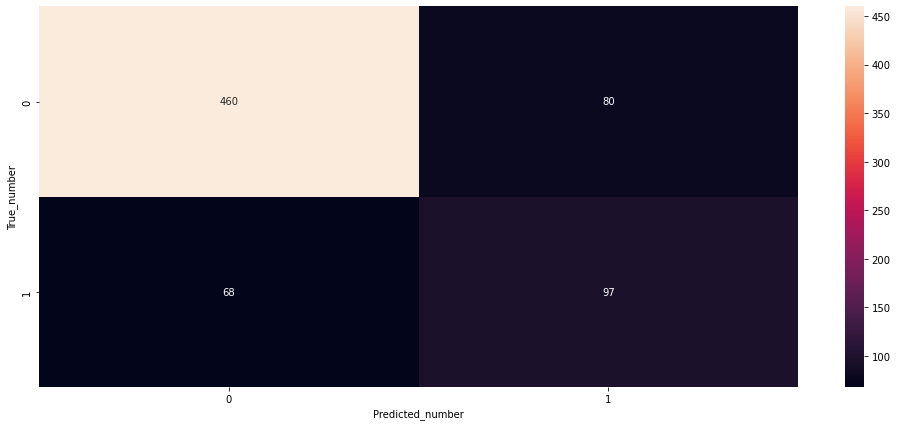

In [63]:
# checking for performance metrices
#importing classification_report and confusion metrics
from sklearn.metrics import confusion_matrix, classification_report
#print classification_report
print(classification_report(ytest,ypred_lis))
# ploting the confusion metrix plot
conf_mat = tf.math.confusion_matrix(labels=ytest,predictions=ypred_lis)
plt.figure(figsize = (17,7))
sb.heatmap(conf_mat, annot=True,fmt='d')
plt.xlabel('Predicted_number')
plt.ylabel('True_number')